# Seminar 11 - Answers

The data in <b>DAX.xlsx</b> contains weekly values of the DAX index from January 2022 to May 2025.

The data was obtained from [investing.com](investing.com).

The $Price$ variable contains the weekly index values and the $Change \%$ variable refers to the weekly percentage change in the index.

In [1]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stt
import statsmodels.tsa.ar_model as arm
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the data set

df = pd.read_excel("DAX.xlsx")
df

,Date,Price,Change %
0,2025-04-05 00:00:00,23480.50,0.0171
1,04/27/2025,23086.65,0.0380
2,04/20/2025,22242.45,0.0489
3,04/13/2025,21205.86,0.0408
4,2025-06-04 00:00:00,20374.10,-0.0130
...,...,...,...
170,01/30/2022,15099.56,-0.0143
171,01/23/2022,15318.95,-0.0183
172,01/16/2022,15603.88,-0.0176
173,2022-09-01 00:00:00,15883.24,-0.0040


In [3]:
# Converting 'Date' coolumn from string to datetime object

df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Price,Change %
0,2025-04-05,23480.50,0.0171
1,2025-04-27,23086.65,0.0380
2,2025-04-20,22242.45,0.0489
3,2025-04-13,21205.86,0.0408
4,2025-06-04,20374.10,-0.0130
...,...,...,...
170,2022-01-30,15099.56,-0.0143
171,2022-01-23,15318.95,-0.0183
172,2022-01-16,15603.88,-0.0176
173,2022-09-01,15883.24,-0.0040


In [4]:
# Inverting the series to show older observations first

df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Change %
0,2022-02-01,15947.74,0.0040
1,2022-09-01,15883.24,-0.0040
2,2022-01-16,15603.88,-0.0176
3,2022-01-23,15318.95,-0.0183
4,2022-01-30,15099.56,-0.0143
...,...,...,...
170,2025-06-04,20374.10,-0.0130
171,2025-04-13,21205.86,0.0408
172,2025-04-20,22242.45,0.0489
173,2025-04-27,23086.65,0.0380


In [5]:
# Modifying column 'Change %' to present percentage rather than decimal

df['Change %'] = df['Change %']*100
df

,Date,Price,Change %
0,2022-02-01,15947.74,0.40
1,2022-09-01,15883.24,-0.40
2,2022-01-16,15603.88,-1.76
3,2022-01-23,15318.95,-1.83
4,2022-01-30,15099.56,-1.43
...,...,...,...
170,2025-06-04,20374.10,-1.30
171,2025-04-13,21205.86,4.08
172,2025-04-20,22242.45,4.89
173,2025-04-27,23086.65,3.80


In [6]:
# Creating a function to find the AR(k) forecasts for each training set

def ar_pred(x,k):
    model = arm.AutoReg(x,lags=k).fit()
    yhat = model.forecast(steps=1)
    return yhat

<b>

1. Plot the time series of the DAX index values and returns and comment on its characteristics.

</b>

<function matplotlib.pyplot.show(close=None, block=None)>

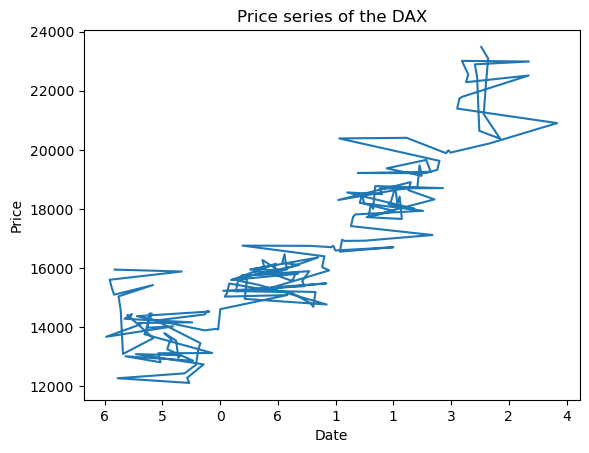

In [17]:
# Plotting the Price Series

plt.plot(df['Price'])

title = "Price series of the DAX"

plt.title(title)                             # Plot title
plt.xlabel("Date")                        # Plot x-axis label
plt.ylabel("Price")                   # Plot y-axis label

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

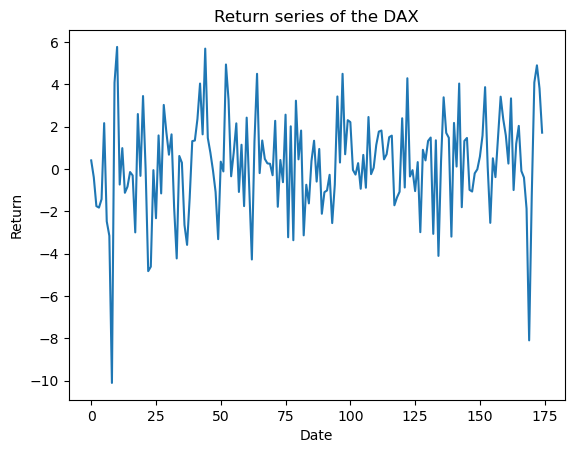

In [8]:
# Plotting the Return Series

plt.plot(df['Change %'])

title = "Return series of the DAX"

plt.title(title)                             # Plot title
plt.xlabel("Date")                        # Plot x-axis label
plt.ylabel("Return")                   # Plot y-axis label

plt.show

Price series has an upward trend and variance appears to change over time. Stochastic trend might be present.

The return series does not show a trend and presents less variability.

<b>

2. For which of these two series do you believe would be appropriate to fit an autoregressive model? 

</b>

The return series appears more stable from a probabilistic sense, which would make it more appropriate for an autoregressive model.

A stationarity test could help us establish which series is stationary.

In [9]:
# Performing the Augmented Dickey-Fuller (ADF) test for the Inflation and Unemployment series

test_price = stt.adfuller(df["Price"])
test_return = stt.adfuller(df["Change %"])

adf_statistic_price = test_price[0]
adf_statistic_return  = test_return[0]

p_value_price = test_price[1]
p_value_return = test_return[1]

# Printing ADF test statistic and p-value for the Inflation and Unemployment series
print("Price: ADF statistic", round(adf_statistic_price,4),"and p-value",round(p_value_price,4))
print("Return: ADF statistic", round(adf_statistic_return,4),"and p-value",round(p_value_return,4))

Price: ADF statistic 0.9493 and p-value 0.9937
Return: ADF statistic -8.4026 and p-value 0.0


<b>

3. Fit an AR(4) model to the data and create 12 week expanding window forecasts. Present a graph comparing forecasts with actual data.
    
</b>

In [10]:
# Creating Expanding Window Forecasts

X = df["Change %"].values

expanding_pred = []

test_size = 12

for i in range(test_size):
    prediction = ar_pred(X[0:i-test_size],k=4)[0]
    expanding_pred.append(prediction)

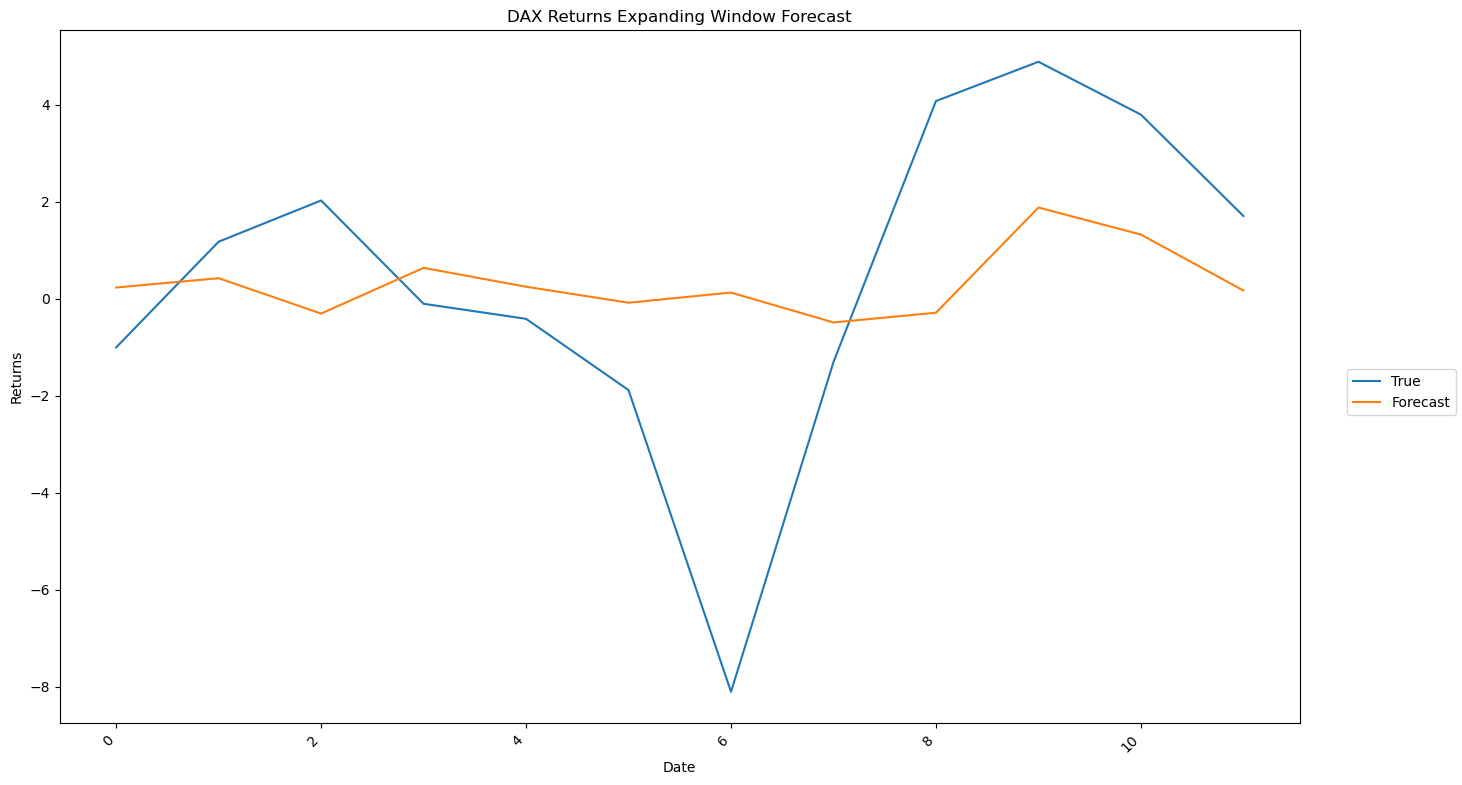

In [11]:
# Creating figure and axis objects
fig, ax = plt.subplots(figsize=(16,9))

# Plotting the rate of growth of the US Real GDP for the test and predictions

ax.plot(X[-test_size:])
ax.plot(expanding_pred)

# Setting title and axis labels
ax.set(title="DAX Returns Expanding Window Forecast",
       ylabel="Returns",xlabel="Date")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Creating legend and setting to center right
fig.legend(['True','Forecast'], loc='center right')

# Show plot
plt.show()

<b>

4. Fit an AR(4) model to the data and create 12 week rolling window forecasts. Present a graph comparing forecasts with actual data.
    
</b>

In [13]:
# Creating Rolling Window Forecasts

rolling_pred = []

test_size = 12

for i in range(test_size):
    prediction = ar_pred(X[i-0:i-test_size],k=4)[0]
    rolling_pred.append(prediction)

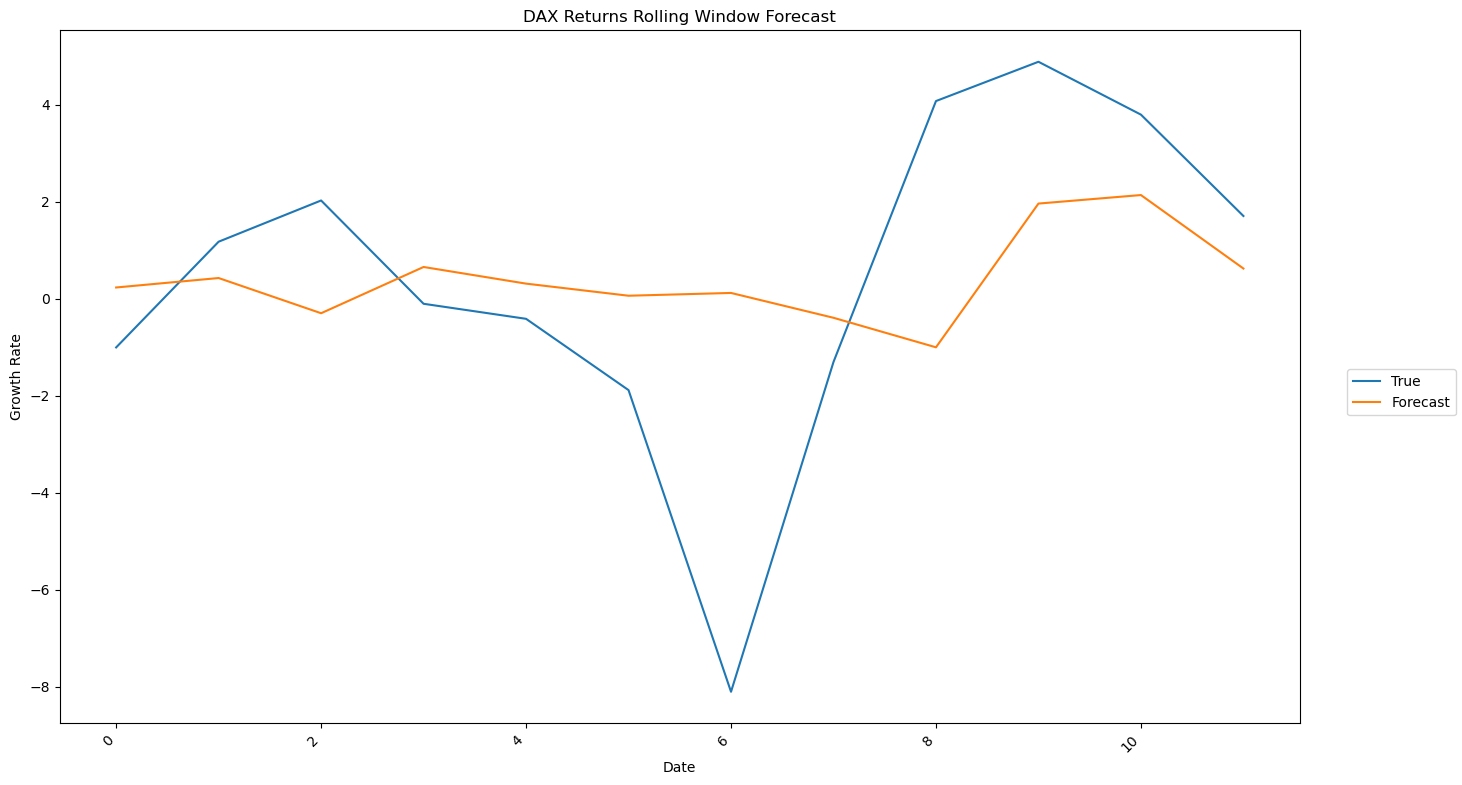

In [14]:
# Creating figure and axis objects
fig, ax = plt.subplots(figsize=(16,9))

# Plotting the rate of growth of the US Real GDP for the test and predictions

ax.plot(X[-test_size:])
ax.plot(rolling_pred)

# Setting title and axis labels
ax.set(title="DAX Returns Rolling Window Forecast",
       ylabel="Growth Rate",xlabel="Date")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Creating legend and setting to center right
fig.legend(['True','Forecast'], loc='center right')

# Show plot
plt.show()

<b>

5. Compute the root mean squared error for both forecasting models and comment on the difference.

</b>

In [15]:
# Calculating the Root Mean Squared Error of the Forecasts

rmse_expanding = np.sqrt(mean_squared_error(X[-test_size:], expanding_pred))
rmse_rolling = np.sqrt(mean_squared_error(X[-test_size:], rolling_pred))


print("The root mean squared error of the expanding window forecasts is:",rmse_expanding)
print("The root mean squared error of the rolling window forecasts is:",rmse_rolling)

The root mean squared error of the expanding window forecasts is: 3.118995953662913
The root mean squared error of the rolling window forecasts is: 3.150239985628717
